## Asset Cost Analysis by Department (Flag 64)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow alm_hardware table, detailing key attributes of hardware assets such as asset tags, display names, configuration item (CI) identifiers, serial numbers, and model categories. It includes information on asset assignment, last update timestamps, cost, departmental allocation, and warranty expiration dates. The table effectively captures asset management activities, offering insights into the operational handling, allocation, and maintenance status of hardware resources across various departments within an organization.

### Your Task
**Goal**: Analyze any uneven distribution and higher cost of assets in the certain department, with a particular focus on the HR department, to optimize asset management and enhance cost-effectiveness.

**Role**: Asset Manager

**Difficulty**: 3 out of 5. The task involves complex data analysis skills to uncover the underlying factors contributing to these departmental discrepancies in asset costs and distribution.

**Category**: Asset Management

## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [3]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the asset analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further operations. This also checks the initial few rows to verify the correct loading of the data.

In [4]:
dataset_path = "csvs/flag-64.csv"
flag_data = pd.read_csv(dataset_path)
df = flag_data
flag_data.head()

,purchased_on,asset_tag,model_category,cost,serial_number,sys_updated_on,assigned_to,department,warranty_expiration,display_name,ci
0,2024-03-01 17:54:00,P1000000,Computer,3629,DZB-49193876,2024-04-25 17:54:00,Genevieve Kekiwi,Customer Support,2026-04-25 17:54:00,Dell Inspiron 3501 Computer,Inspiron 3501
1,2024-02-12 23:13:00,P1000001,Computer,2970,LKQ-61403004,2024-03-29 23:13:00,Logan Muhl,Customer Support,2026-03-29 23:13:00,Dell Inspiron 7501 Laptop,Inspiron 7501
2,2024-02-13 19:09:00,P1000002,Computer,4701,TYB-81675175,2024-04-12 19:09:00,Latisha Bahls,Customer Support,2025-04-12 19:09:00,Dell Inspiron 3580,Inspiron 3580
3,2024-02-16 23:18:00,P1000003,Computer,2484,AFI-35627823,2024-03-29 23:18:00,Stephen Seiters,HR,2025-03-29 23:18:00,Dell Inspiron Desktop Computer,Inspiron Desktop
4,2024-02-09 18:34:00,P1000004,Computer,1528,ADF-83782545,2024-03-15 18:34:00,Bertram Quertermous,IT,2025-03-15 18:34:00,Dell Optiplex 7080,Optiplex 7080


### **Question 1:  Is there a noticeable trend between the timing of asset purchases and the warranty expiration dates for different departments?**


#### Analyzing Asset Purchase Timing vs. Warranty Expiration by Department
This plot investigates whether assets in specific departments are purchased closer to their warranty expiration dates. By exploring this relationship, we can gain insights into potential risks of warranty overlap or delays in renewals across departments.

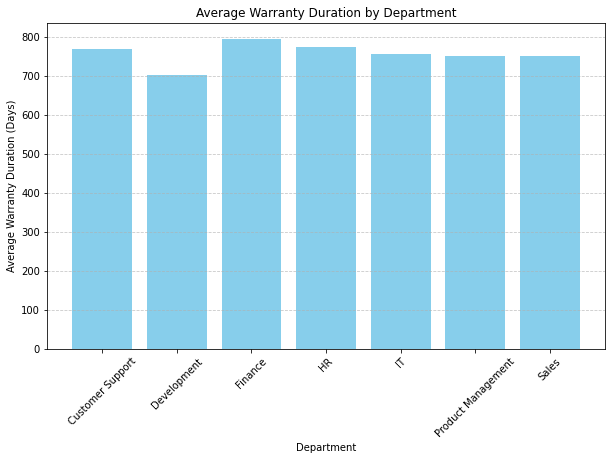

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Load the data
flag_data = pd.read_csv("csvs/flag-64.csv")

# Convert dates to datetime format for analysis
flag_data["purchased_on"] = pd.to_datetime(flag_data["purchased_on"])
flag_data["warranty_expiration"] = pd.to_datetime(flag_data["warranty_expiration"])

# Calculate the warranty duration in days for each asset
flag_data["warranty_duration_days"] = (
    flag_data["warranty_expiration"] - flag_data["purchased_on"]
).dt.days

# Aggregate the average warranty duration by department
warranty_data = (
    flag_data.groupby("department")["warranty_duration_days"].mean().reset_index()
)

# Plot the average warranty duration by department
plt.figure(figsize=(10, 6))
plt.bar(
    warranty_data["department"],
    warranty_data["warranty_duration_days"],
    color="skyblue",
)
plt.title("Average Warranty Duration by Department")
plt.xlabel("Department")
plt.ylabel("Average Warranty Duration (Days)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "departmental_trend",
    "insight": "The Finance department has the longest average warranty duration for assets, while Development has the shortest.",
    "insight_value": {
        "description": "Assets purchased for the Finance department tend to have warranties lasting around 797 days, suggesting a possible emphasis on longer warranty periods in Finance. In contrast, the Development department averages around 704 days, which may indicate a higher turnover or faster refresh cycle for assets in that department."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Warranty Duration by Department",
        "x_axis": {
            "name": "Department",
            "value": "Various departments such as Customer Support, Finance, HR, IT, etc.",
            "description": "This axis categorizes the data by department, allowing for a comparison of warranty durations across departments.",
        },
        "y_axis": {
            "name": "Average Warranty Duration (Days)",
            "value": "Values range from approximately 700 to 800 days",
            "description": "This axis represents the average number of days between asset purchase and warranty expiration for each department.",
        },
        "description": "The bar plot highlights a significant difference in warranty durations across departments, suggesting that some departments prioritize longer warranties, while others might prefer shorter cycles or asset refreshes.",
    },
    "question": "Is there a noticeable trend between the timing of asset purchases and the warranty expiration dates for different departments?",
    "actionable_insight": "Departments with shorter warranty durations, like Development, may benefit from regular asset refreshes to keep up with technological advancements, while Finance could maintain longer warranties, possibly to align with their asset stability requirements. This insight encourages a tailored approach to warranty planning, potentially optimizing costs and improving resource allocation based on department-specific needs.",
}

{'data_type': 'departmental_trend',
 'insight': 'The Finance department has the longest average warranty duration for assets, while Development has the shortest.',
 'insight_value': {'description': 'Assets purchased for the Finance department tend to have warranties lasting around 797 days, suggesting a possible emphasis on longer warranty periods in Finance. In contrast, the Development department averages around 704 days, which may indicate a higher turnover or faster refresh cycle for assets in that department.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Warranty Duration by Department',
  'x_axis': {'name': 'Department',
   'value': 'Various departments such as Customer Support, Finance, HR, IT, etc.',
   'description': 'This axis categorizes the data by department, allowing for a comparison of warranty durations across departments.'},
  'y_axis': {'name': 'Average Warranty Duration (Days)',
   'value': 'Values range from approximately 700 to 800 days',
   'description': '

### **Question 2:  What types of assets contribute to the higher average cost in the HR department?**


#### Plot total and average cost of different asset types in HR department
This cell visualizes both the total and average costs of various asset types managed by the HR department, aiding in the identification of specific asset categories that contribute to higher overall expenses. By differentiating between total and average costs, the plot provides some understanding of how different types of assets impact the department's financial resources. 

<ipython-input-7-bee142b60bbe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_assets['cost'] = pd.to_numeric(hr_assets['cost'], errors='coerce')


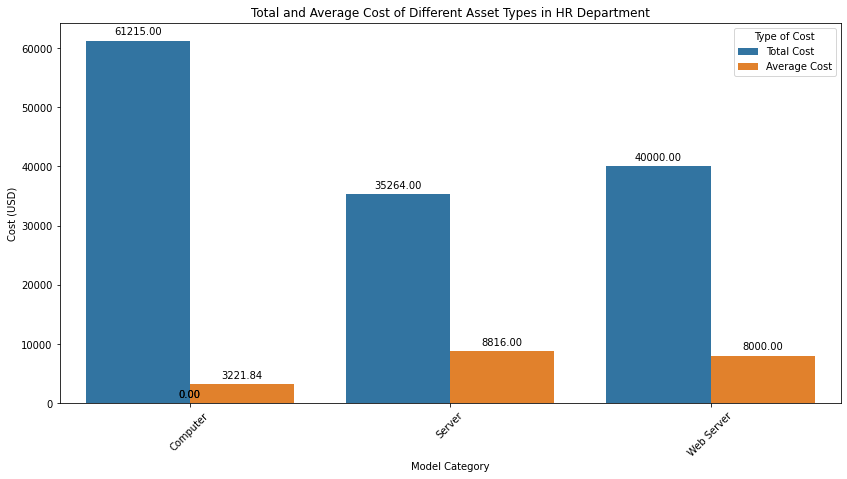

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'df' is your DataFrame containing the asset data
# Filter the DataFrame for only the HR department
hr_assets = df[df['department'] == 'HR']

# Convert the 'cost' column to numeric, just in case it's not already
hr_assets['cost'] = pd.to_numeric(hr_assets['cost'], errors='coerce')

# Calculate total and average cost per model category
total_cost = hr_assets.groupby('model_category')['cost'].sum().reset_index(name='Total Cost')
average_cost = hr_assets.groupby('model_category')['cost'].mean().reset_index(name='Average Cost')

# Merge the total and average cost dataframes
cost_data = pd.merge(total_cost, average_cost, on='model_category')

# Melt the dataframe to suit the seaborn barplot format for grouped bars
melted_cost_data = cost_data.melt(id_vars='model_category', var_name='Type of Cost', value_name='Cost')

# Create the bar plot
plt.figure(figsize=(14, 7))
avg_bar_plot = sns.barplot(data=melted_cost_data, x='model_category', y='Cost', hue='Type of Cost')

for p in avg_bar_plot.patches:
    avg_bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
    
plt.title('Total and Average Cost of Different Asset Types in HR Department')
plt.xlabel('Model Category')
plt.ylabel('Cost (USD)')
plt.xticks(rotation=45)
plt.legend(title='Type of Cost')
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "Computers, Servers, and Web Servers in HR Department have the highest cost contributions",
    "insight_value": {
        "Computers": {"Total Cost": "61215$", "Average Cost": "3221$"},
        "Server": {"Total Cost": "35264$", "Average Cost": "8816$"},
        "Web Server": {"Total Cost": "40000$", "Average Cost": "8000$"}
    },
    "plot": {
        "plot_type": "grouped_bar",
        "title": "Total and Average Cost of Asset Types in HR Department",
        "x_axis": {
            "name": "Model Category",
            "value": ["Computers", "Server", "Web Server"],
            "description": "This represents different asset categories in the HR department."
        },
        "y_axis": {
            "name": "Cost in USD",
            "value": "Displays both total and average costs",
            "description": "This represents both the total and average costs of assets, highlighting which models contribute the most financially."
        },
        "description": "The grouped bar chart demonstrates that Computers, Servers, and Web Servers have the highest total costs in the HR department. Moreover, Servers and Web Servers exhibit higher average costs, indicating their high-end value and significant financial contribution to departmental assets."
    },
    "question": "What types of assets contribute to the higher average cost in the HR department?",
    "actionable_insight": "Considering the high average costs associated with Servers and Web Servers, it is advisable for the HR department to evaluate the necessity and utilization of these high-end assets to ensure cost-effectiveness. Possible actions include reassessing the asset lifecycle, optimizing usage, and exploring cost-saving alternatives without compromising on required functionalities."
}


{'data_type': 'descriptive',
 'insight': 'Computers, Servers, and Web Servers in HR Department have the highest cost contributions',
 'insight_value': {'Computers': {'Total Cost': '61215$',
   'Average Cost': '3221$'},
  'Server': {'Total Cost': '35264$', 'Average Cost': '8816$'},
  'Web Server': {'Total Cost': '40000$', 'Average Cost': '8000$'}},
 'plot': {'plot_type': 'grouped_bar',
  'title': 'Total and Average Cost of Asset Types in HR Department',
  'x_axis': {'name': 'Model Category',
   'value': ['Computers', 'Server', 'Web Server'],
   'description': 'This represents different asset categories in the HR department.'},
  'y_axis': {'name': 'Cost in USD',
   'value': 'Displays both total and average costs',
   'description': 'This represents both the total and average costs of assets, highlighting which models contribute the most financially.'},
  'description': 'The grouped bar chart demonstrates that Computers, Servers, and Web Servers have the highest total costs in the HR dep

### **Question 3:  What are the number of high-end assets such as Server and Web Server across all departments compared with HR department?**

### Plot distribution of expensive assets (Server and Web Server) by department
This cell provides a visual comparison of high-end asset distribution, specifically servers and web servers, across different departments, highlighting how the HR department's holdings compare to others.

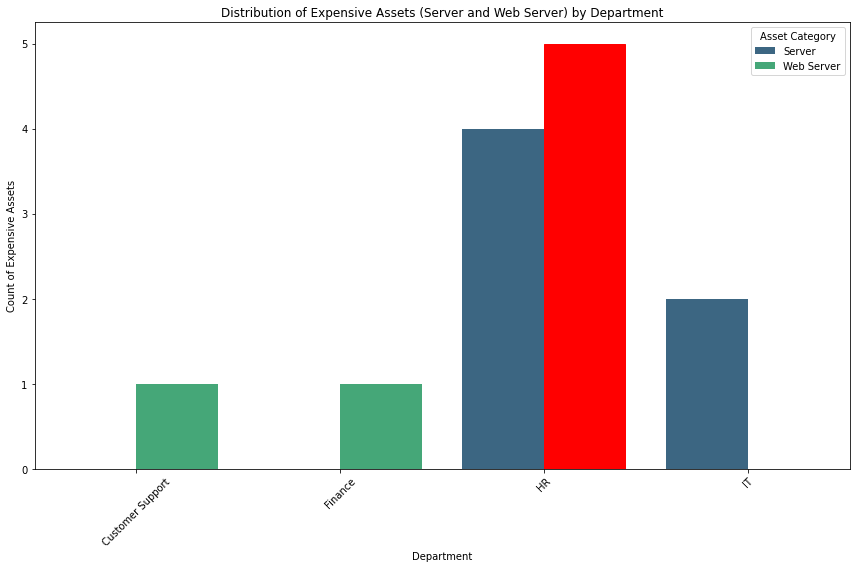

In [9]:
# Filter data for relevant categories (Server and Web Server)
expensive_assets = flag_data[flag_data['model_category'].isin(['Server', 'Web Server'])]

# Count the number of each category within each department
category_counts = expensive_assets.groupby(['department', 'model_category']).size().unstack(fill_value=0).reset_index()

# Create a bar plot showing the counts of Server and Web Server by department
plt.figure(figsize=(12, 8))
sns.barplot(data=category_counts.melt(id_vars=["department"], var_name="model_category", value_name="count"), 
            x='department', y='count', hue='model_category', palette="viridis")
plt.title('Distribution of Expensive Assets (Server and Web Server) by Department')
plt.xlabel('Department')
plt.ylabel('Count of Expensive Assets')
plt.xticks(rotation=45)

# Emphasize the HR department by changing the color of its bars
for bar in plt.gca().patches:
    if bar.get_x() == category_counts.index[category_counts['department'] == 'HR'][0]:
        bar.set_color('red')  # Change color to red for HR department

plt.legend(title='Asset Category')
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "There is a concentration of High-End Assets in the HR Department Compared to Other Departments",
    "insight_value": {
        "HR": {"Servers": "4", "Web Servers": "5"},
        "Customer Support": {"Servers": "0", "Web Servers": "1"},
        "Finance": {"Servers": "0", "Web Servers": "1"},
        "IT": {"Servers": "2", "Web Servers": "0"},
        "Other Departments": {"Servers": "0", "Web Servers": "0"}
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of High-End Assets Across Departments",
        "x_axis": {
            "name": "Department",
            "value": ["HR", "Customer Support", "Finance", "IT", "Other"],
            "description": "This represents the various departments within the organization."
        },
        "y_axis": {
            "name": "Number of High-End Assets",
            "value": "Counts of Servers and Web Servers",
            "description": "This shows the count of high-end assets, specifically Servers and Web Servers, within each department."
        },
        "description": "This bar chart illustrates the distribution of high-end assets across departments, highlighting a significant concentration of Servers and Web Servers in the HR department compared to others. Customer Support and Finance have minimal Web Servers, while IT has a moderate number of Servers, and other departments lack these high-end assets entirely."
    },
    "question": "What is the contribution from high-end assets such as Server and Web Server across all departments to compare with HR department?",
    "actionable_insight": "The HR department's higher allocation of Servers and Web Servers suggests a potential overinvestment in these high-end assets or specific operational needs that justify such investment. It is crucial for the organization to assess the utilization and necessity of these assets in HR compared to other departments. Possible actions include realigning asset distribution based on actual usage and needs, or redistributing underutilized assets to departments that may benefit from them, ensuring optimal asset utilization and cost efficiency across the organization."
}


{'data_type': 'diagnostic',
 'insight': 'There is a concentration of High-End Assets in the HR Department Compared to Other Departments',
 'insight_value': {'HR': {'Servers': '4', 'Web Servers': '5'},
  'Customer Support': {'Servers': '0', 'Web Servers': '1'},
  'Finance': {'Servers': '0', 'Web Servers': '1'},
  'IT': {'Servers': '2', 'Web Servers': '0'},
  'Other Departments': {'Servers': '0', 'Web Servers': '0'}},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of High-End Assets Across Departments',
  'x_axis': {'name': 'Department',
   'value': ['HR', 'Customer Support', 'Finance', 'IT', 'Other'],
   'description': 'This represents the various departments within the organization.'},
  'y_axis': {'name': 'Number of High-End Assets',
   'value': 'Counts of Servers and Web Servers',
   'description': 'This shows the count of high-end assets, specifically Servers and Web Servers, within each department.'},
  'description': 'This bar chart illustrates the distribution of high-end

### **Question 4: Is there a correlation between the number of users and the cost of computer assets in the HR department?**


#### Plot number of users and computers per department
This cell focuses on analysis to explore the correlation between number of users and  number of computer assets in each department, particualrly the HR department. The objective is to understand how the distribution of computer assets aligns with the staffing levels across departments

           department  Total Computers  Total Users
0    Customer Support               86           66
1         Development               12            9
2             Finance               15           11
3                  HR               19            4
4                  IT               36           32
5  Product Management                8            7
6               Sales               71           54


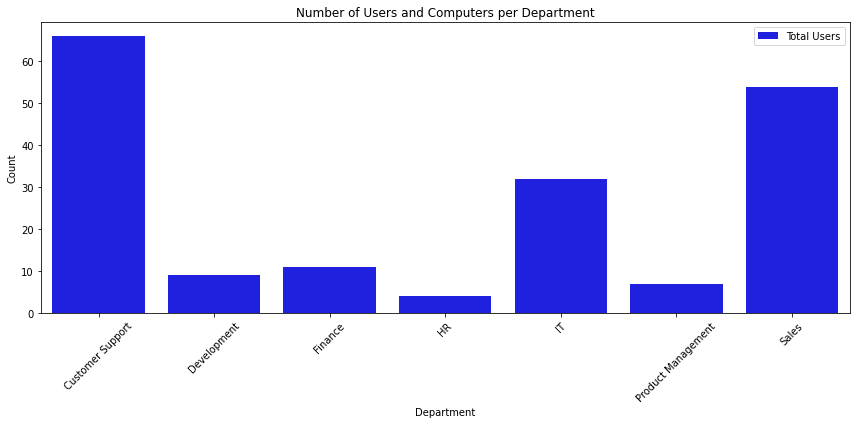

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'flag_data' is the DataFrame that contains the entire asset dataset

# Filter for entries where 'model_category' is 'Computer'
computers_data = flag_data[flag_data['model_category'] == 'Computer']

# Group by 'department' and count the number of computers per department
computers_per_department = computers_data.groupby('department').size().reset_index(name='Total Computers')

# Group by 'department' and count unique users per department
users_per_department = flag_data.groupby('department')['assigned_to'].nunique().reset_index(name='Total Users')

# Merge the two dataframes on 'department'
department_summary = pd.merge(computers_per_department, users_per_department, on='department', how='outer')

# Fill any NaN values which might appear if there are departments with no computers or users
department_summary.fillna(0, inplace=True)

# Print the result
print(department_summary)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=department_summary, x='department', y='Total Users', color='blue', label='Total Users')
# sns.barplot(data=department_summary, x='department', y='Total Computers', color='red', alpha=0.6, label='Total Computers')

plt.title('Number of Users and Computers per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()


#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "diagnostic",
    "insight": "There is a weak correlation between mumber of users and high cost of computer assets in HR Department",
    "insight_value": {
        "Number of Users in HR": "4",
        "Total Cost of Computers": "60000$",
        "Average Cost per User": "15000$ per user"
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Correlation Between Number of Users and Cost of Computers in HR Department",
        "x_axis": {
            "name": "Number of Users",
            "value": "4",
            "description": "This represents the total number of users within the HR department."
        },
        "y_axis": {
            "name": "Cost of Computer Assets",
            "value": "60000$",
            "description": "This indicates the total cost of computer assets within the HR department, averaged per user."
        },
        "description": "This scatter plot visually represents the relationship between the number of users in the HR department and the total cost of their computer assets. Despite having the least number of users among all departments, the HR department shows a disproportionately high cost of computer assets, indicating a weak correlation between the number of users and asset costs."
    },
    "question": "Is there a correlation between the number of users and the cost of computer assets in the HR department?",
    "actionable_insight": "Given the disproportionate cost of computer assets relative to the small number of users in the HR department, it is advisable to review the justification for such high expenses. The organization should consider evaluating the specific needs of the HR department's users to ensure that these assets are essential and effectively utilized. Further investigation into the procurement process may also reveal opportunities for cost optimization without compromising operational efficiency."
}


{'data_type': 'diagnostic',
 'insight': 'There is a weak correlation between mumber of users and high cost of computer assets in HR Department',
 'insight_value': {'Number of Users in HR': '4',
  'Total Cost of Computers': '60000$',
  'Average Cost per User': '15000$ per user'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Number of Users and Cost of Computers in HR Department',
  'x_axis': {'name': 'Number of Users',
   'value': '4',
   'description': 'This represents the total number of users within the HR department.'},
  'y_axis': {'name': 'Cost of Computer Assets',
   'value': '60000$',
   'description': 'This indicates the total cost of computer assets within the HR department, averaged per user.'},
  'description': 'This scatter plot visually represents the relationship between the number of users in the HR department and the total cost of their computer assets. Despite having the least number of users among all departments, the HR department shows a disprop

### **Question 5: How does the distribution of total asset costs compare between departments, especially focusing on high-end categories like "Computer" and "Server"?**
  


#### Analysis of Total Cost Distribution by Department for Selected High-End Asset Categories
This analysis focuses on the total expenditure for high-end assets like "Computer" and "Server" across departments, giving insight into departmental spending on these essential resources. By aggregating and visualizing the total costs, we can see which departments have higher investment in these asset types.


<ipython-input-13-c61b0b4bd3b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_end_assets["cost"] = pd.to_numeric(high_end_assets["cost"], errors="coerce")


<Figure size 864x576 with 0 Axes>

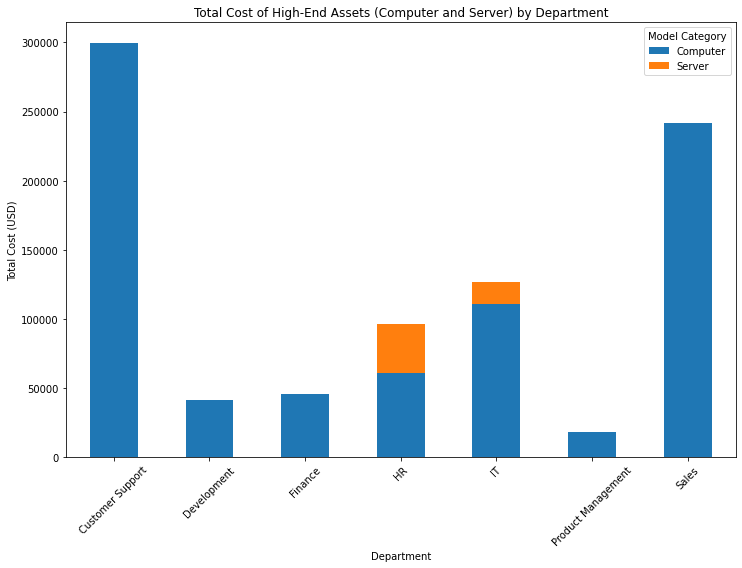

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter DataFrame for high-end assets: Computers and Servers
high_end_assets = df[df["model_category"].isin(["Computer", "Server"])]

# Convert 'cost' to numeric to ensure accurate calculations
high_end_assets["cost"] = pd.to_numeric(high_end_assets["cost"], errors="coerce")

# Group by department and model category to calculate the total cost for each category per department
department_costs = (
    high_end_assets.groupby(["department", "model_category"])["cost"]
    .sum()
    .reset_index()
)

# Pivot the table to have departments on the x-axis and model categories as the values
department_costs_pivot = department_costs.pivot(
    index="department", columns="model_category", values="cost"
).fillna(0)

# Plotting the data with a stacked bar chart to show total expenditure per department
plt.figure(figsize=(12, 8))
department_costs_pivot.plot(kind="bar", stacked=True, figsize=(12, 8))

# Adding labels and title
plt.title("Total Cost of High-End Assets (Computer and Server) by Department")
plt.xlabel("Department")
plt.ylabel("Total Cost (USD)")
plt.xticks(rotation=45)
plt.legend(title="Model Category", loc="upper right")

# Display the plot
plt.show()

#### Generate JSON Description for the Insight

In [14]:
{
    "data_type": "diagnostic",
    "insight": "Customer Support and Sales departments lead in investment in high-end Computers, while the HR department has notable spending on both Computers and Servers.",
    "insight_value": {
        "Customer Support": {"Computer": "299,570 USD", "Server": "0 USD"},
        "Development": {"Computer": "41,532 USD", "Server": "0 USD"},
        "Finance": {"Computer": "45,409 USD", "Server": "0 USD"},
        "HR": {"Computer": "61,215 USD", "Server": "35,264 USD"},
        "IT": {"Computer": "110,924 USD", "Server": "15,881 USD"},
        "Product Management": {"Computer": "18,402 USD", "Server": "0 USD"},
        "Sales": {"Computer": "241,880 USD", "Server": "0 USD"},
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Cost of High-End Assets (Computer and Server) by Department",
        "x_axis": {
            "name": "Department",
            "value": [
                "Customer Support",
                "Development",
                "Finance",
                "HR",
                "IT",
                "Product Management",
                "Sales",
            ],
            "description": "Represents each department's allocation of funds towards high-end Computers and Servers.",
        },
        "y_axis": {
            "name": "Total Cost (USD)",
            "value": "Sum of costs for Computers and Servers",
            "description": "Shows the total expenditure on Computers and Servers within each department.",
        },
        "description": "This stacked bar chart shows the total spending per department on high-end assets (Computers and Servers). Customer Support and Sales departments show high spending on Computers, while HR has substantial investment in both Computers and Servers.",
    },
    "question": "How does the distribution of total asset costs compare between departments, especially focusing on high-end categories like 'Computer' and 'Server'?",
    "actionable_insight": "The significant investment in high-end assets by Customer Support, Sales, and HR suggests high dependency or utilization of these resources in these departments. Reviewing the asset utilization and the specific needs of these departments may help optimize asset allocation across the organization, especially in areas with lower asset usage.",
}

{'data_type': 'diagnostic',
 'insight': 'Customer Support and Sales departments lead in investment in high-end Computers, while the HR department has notable spending on both Computers and Servers.',
 'insight_value': {'Customer Support': {'Computer': '299,570 USD',
   'Server': '0 USD'},
  'Development': {'Computer': '41,532 USD', 'Server': '0 USD'},
  'Finance': {'Computer': '45,409 USD', 'Server': '0 USD'},
  'HR': {'Computer': '61,215 USD', 'Server': '35,264 USD'},
  'IT': {'Computer': '110,924 USD', 'Server': '15,881 USD'},
  'Product Management': {'Computer': '18,402 USD', 'Server': '0 USD'},
  'Sales': {'Computer': '241,880 USD', 'Server': '0 USD'}},
 'plot': {'plot_type': 'bar',
  'title': 'Total Cost of High-End Assets (Computer and Server) by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Development',
    'Finance',
    'HR',
    'IT',
    'Product Management',
    'Sales'],
   'description': "Represents each department's allocation of 

### Summary of Findings (Flag 64):

1. **Warranty Duration Disparities**: The Finance department enjoys the longest average warranty durations for its assets, suggesting a strategic focus on long-term asset stability. In contrast, the Development department has the shortest durations, possibly indicating a faster refresh cycle or higher asset turnover.

2. **HR Department's High-End Asset Concentration**: The HR department shows a significant concentration of high-end assets, such as servers and web servers, compared to other departments. This suggests either a specific operational need or potential overinvestment, warranting a review of asset utilization and necessity.

3. **Cost Discrepancies in High-End Assets**: Customer Support and Sales departments lead in investment in high-end computers, while the HR department has notable spending on both computers and servers. This highlights a potential area for optimizing asset allocation and ensuring cost-effectiveness across departments.